In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle  


%matplotlib inline

plt.style.use('ggplot')

In [4]:
with open ('../data/complete_data.p', 'rb') as fp:
    data = pickle.load(fp)
data.head()


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,tempo,time_signature,track_href,type,uri,valence,artist,artist_id,song,song_id
0,0.000397,https://api.spotify.com/v1/audio-analysis/3ySU...,0.630,215547,0.884,3ySU5vwQB33iGulwcUL9qQ,0.000001,1,0.2060,-5.674,...,110.070,4.0,https://api.spotify.com/v1/tracks/3ySU5vwQB33i...,audio_features,spotify:track:3ySU5vwQB33iGulwcUL9qQ,0.290,Bleachers,2eam0iDomRHGBypaDQLwWI,Don't Take The Money,3ySU5vwQB33iGulwcUL9qQ
1,0.002050,https://api.spotify.com/v1/audio-analysis/5L95...,0.421,188867,0.790,5L95vS64rG1YMIFm1hLjyZ,0.000309,10,0.1480,-6.227,...,162.024,4.0,https://api.spotify.com/v1/tracks/5L95vS64rG1Y...,audio_features,spotify:track:5L95vS64rG1YMIFm1hLjyZ,0.275,Bleachers,2eam0iDomRHGBypaDQLwWI,Rollercoaster,5L95vS64rG1YMIFm1hLjyZ
2,0.002810,https://api.spotify.com/v1/audio-analysis/1Bwh...,0.446,204520,0.915,1BwhFXqoIsePt21WyWIttb,0.000039,9,0.2180,-6.221,...,190.013,4.0,https://api.spotify.com/v1/tracks/1BwhFXqoIseP...,audio_features,spotify:track:1BwhFXqoIsePt21WyWIttb,0.402,Bleachers,2eam0iDomRHGBypaDQLwWI,I Wanna Get Better,1BwhFXqoIsePt21WyWIttb
3,0.577000,https://api.spotify.com/v1/audio-analysis/1K13...,0.650,193413,0.448,1K13OsIMc0HLgEJHZoWH78,0.000000,2,0.1310,-9.534,...,79.989,4.0,https://api.spotify.com/v1/tracks/1K13OsIMc0HL...,audio_features,spotify:track:1K13OsIMc0HLgEJHZoWH78,0.512,Bleachers,2eam0iDomRHGBypaDQLwWI,Goodmorning,1K13OsIMc0HLgEJHZoWH78
4,0.026400,https://api.spotify.com/v1/audio-analysis/7FqS...,0.776,185853,0.560,7FqScuVJysPgwVFcepFJks,0.000000,7,0.0496,-7.181,...,109.466,4.0,https://api.spotify.com/v1/tracks/7FqScuVJysPg...,audio_features,spotify:track:7FqScuVJysPgwVFcepFJks,0.573,Bleachers,2eam0iDomRHGBypaDQLwWI,Hate That You Know Me,7FqScuVJysPgwVFcepFJks


In [22]:
with open('../data/complete_data_py2.p', 'wb') as fp:
    pickle.dump(data, fp, protocol=2)


In [127]:
def data_as_array(df):
    X = df[['acousticness', 'instrumentalness', 'valence',
           'danceability', 'energy']].values
    return X

In [128]:
df, pl = data.drop(data.tail(10).index), data.tail(10)
pl_data = data_as_array(pl)
song_db = data_as_array(df)
eu_dist = np.sqrt(((pl_data - song_db[:, np.newaxis, :])**2).sum(axis=2))
suggestions = df.iloc[np.argmin(eu_dist, axis=0)].sort_values('tempo', ascending=False)
np.argmin(eu_dist, axis=0)

array([ 649, 5491, 4014, 5521, 5343, 4412, 3738, 1876, 5491, 5035])

## PCA for Visualizations

In [129]:
from sklearn.decomposition import PCA, TruncatedSVD
from pandas.tools.plotting import scatter_matrix

X = data_as_array(data)
pcd = PCA(2).fit(X)
data_reduced = np.dot(X, pcd.components_.T)

In [130]:
def plot_params(length = len(X), sugg_ind = np.argmin(eu_dist, axis=0), pl_ind = np.arange(len(X)-10,len(X))):
    colors = np.zeros(length, dtype=np.int)
    size   = np.repeat(10, length)
    
    colors[pl_ind] = np.repeat(1, len(pl_ind))
    colors[sugg_ind] = np.repeat(2, len(np.argmin(eu_dist, axis=0)))
    size[pl_ind] = np.repeat(30, len(pl_ind))
    size[sugg_ind] = np.repeat(30, len(np.argmin(eu_dist, axis=0)))

    return colors, size


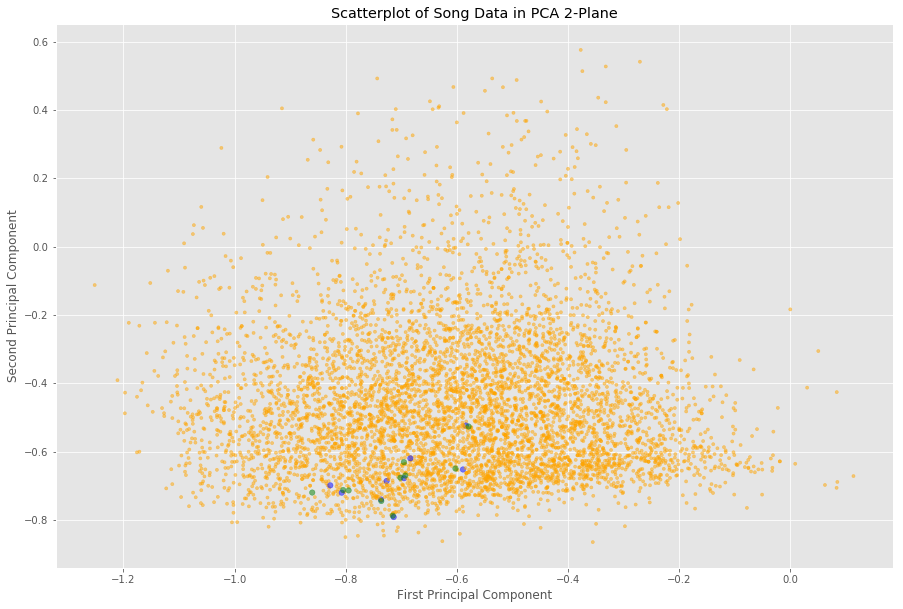

In [131]:
colors, size = plot_params()

fig, ax = plt.subplots(1, figsize=(15, 10))

ax.scatter(data_reduced[:, 0], data_reduced[:, 1], c= np.array(["orange", "green", "blue"])[colors], 
           alpha= .5, s=size, marker='o')
ax.set_title("Scatterplot of Song Data in PCA 2-Plane")
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")

## Multi-dimensional Scaling


In [132]:
data_mat = data_as_array(data)
eu_dist = np.sqrt(((data_mat - data_mat[:, np.newaxis, :])**2).sum(axis=2))

In [133]:
eu_dist.shape


(5931, 5931)

In [134]:
# consider any songs with < 0.5 dist as connected/related
np.amax(eu_dist)

1.7951176209095603

/Users/juliecreamer/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning:

divide by zero encountered in true_divide



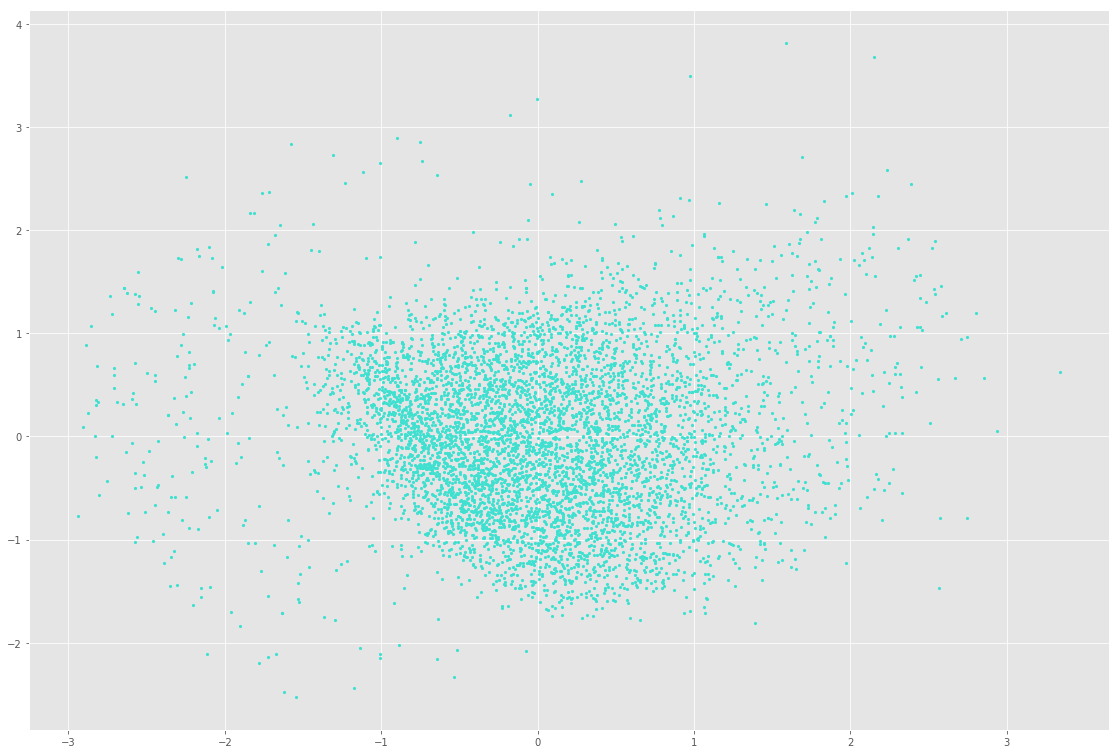

In [135]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA

n_samples = len(data)
X_true = data_mat
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
# pos = mds.fit(eu_dist).embedding_
with open('../data/mds_fit.p', 'rb') as fp:
    pos = pickle.load(fp)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

fig = plt.figure(1, figsize=(15,10))
ax = plt.axes([0., 0., 1., 1.])

s = 10
# plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
#             label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
# plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
# plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = eu_dist.max() / eu_dist * 100
similarities[np.isinf(similarities)] = 0

plt.show()


In [136]:
import plotly.plotly as py
import plotly.graph_objs as go
import random
import numpy as np
import pandas as pd

labels = zip(data['song'].values, data['artist'].values)
trace = go.Scatter(
    x = pos[:, 0],
    y = pos[:, 1],
    mode = 'markers',
    marker= dict(size= 8,
                line= dict(width=1),
                opacity= 0.3
               ),
    text= data['song']+' by '+ data['artist']
    )


layout= go.Layout(
    title= 'Song Network',
    hovermode= 'closest',
    autosize=False,
    width=1000,
    height=1000,
    xaxis= dict(
#         title= 'Pop',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
#         title= 'Rank',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)
fig= go.Figure(data= [trace], layout=layout)
py.iplot(fig)

In [60]:
len(pos)

5931

In [14]:
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

In [61]:
with open ('../data/mds_fit.p', 'wb') as fp:
    pickle.dump(pos, fp)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# data = data[:100]

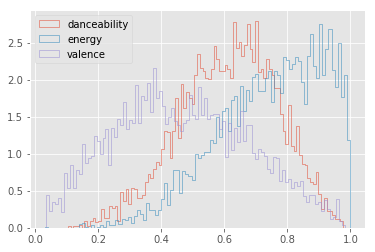

In [39]:
# features = ['acousticness', 'instrumentalness', 'valence','danceability', 'energy']
# colors = ['red', 'blue', 'green', 'cyan', 'orange']
features = ['danceability', 'energy', 'valence']
colors = ['cyan', 'orange', 'green']
fig, ax = plt.subplots()
for i, feature in enumerate(features):
    ax.hist(data[feature],
             bins=100,
             range=(min(data[feature]),max(data[feature])),
             facecolor=colors[i], 
             histtype = 'step',
             normed=1,
             label = feature);
    ax.legend(loc="upper left")
# fig.savefig('test.png')

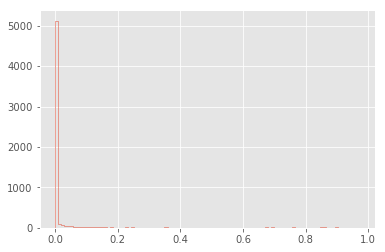

In [12]:
plt.hist(data['instrumentalness'],
         bins=100,
         range=(min(data['instrumentalness']),max(data['instrumentalness'])),
         facecolor='red', 
         histtype = 'step');


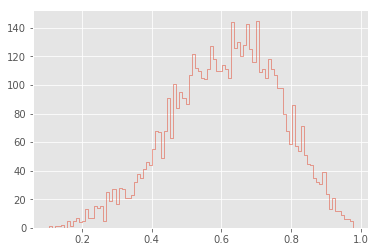

In [14]:
plt.hist(data['danceability'],
         bins=100,
         range=(min(data['danceability']),max(data['danceability'])),
         facecolor='red', 
         histtype = 'step');

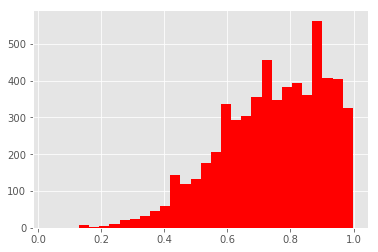

In [28]:
plt.hist(data['energy'].round(2),
         bins=30,
         range=(min(data['energy']),max(data['energy'])),
         facecolor='red');

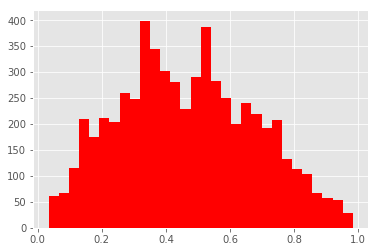

In [30]:
plt.hist(data['valence'].round(2),
         bins=30,
         range=(min(data['valence']),max(data['valence'])),
         facecolor='red');

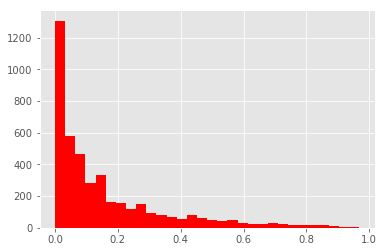

In [32]:
plt.hist(data['acousticness'].round(2),
         bins=30,
         range=(min(data['acousticness']),max(data['acousticness'])),
         facecolor='red');

In [5]:
most_similar = np.argsort([0.1,.2,.1,.4])

In [6]:
most_similar

array([0, 2, 1, 3])

In [9]:
data.iloc[most_similar]['tempo'].values

array([ 110.07 ,  190.013,  162.024,   79.989])

In [10]:
1.<None<2.

TypeError: '<' not supported between instances of 'float' and 'NoneType'

In [15]:
distances =np.array([4,6,3,7,8,9,1,0])

In [12]:
np.argsort(distances)

array([7, 6, 2, 0, 1, 3, 4, 5])

In [16]:
tempos = np.array([50, 60, 70, 80, 100, 120, 60, 90])

In [14]:
heart_rate = 85

In [20]:
alpha = 0.1

In [21]:
np.argsort(distances + alpha * (heart_rate - tempos)**2 )

array([7, 3, 2, 4, 6, 1, 0, 5])

In [18]:
(heart_rate - tempos)**2

array([1225,  625,  225,   25,  225, 1225,  625,   25])

In [26]:
data.artist_id.unique()

array(['2eam0iDomRHGBypaDQLwWI', '5yG7ZAZafVaAlMTeBybKAL',
       '64tNsm6TnZe2zpcMVMOoHL', '44wJRGNtWywCUJZug8FJg3',
       '1ZjAT2nTrzDIXFfsQ2hWJk', '4xnMDfgEmXZEEDdITKcGuE',
       '4YLQaW1UU3mrVetC8gNkg5', '2zHHEU3t9cutZFyG0fHdOR',
       '0TImkz4nPqjegtVSMZnMRq', '15Dh5PvHQj909E0RgAe0aN',
       '2Mu5NfyYm8n5iTomuKAEHl', '5ZS223C6JyBfXasXxrRqOk',
       '17lzZA2AlOHwCwFALHttmp', '13y7CgLHjMVRMDqxdx0Xdo',
       '0Y5tJX1MQlPlqiwlOH1tJY', '6Ha4aES39QiVjR0L2lwuwq',
       '3HiuzBlSW7pGDXlSFMhO2g', '50co4Is1HCEo8bhOyUWKpn',
       '0ONHkAv9pCAFxb0zJwDNTy', '2uH0RyPcX7fnCcT90HFDQX',
       '6Ff53KvcvAj5U7Z1vojB5o', '2dWF6m2ksP9GN75fufFp16',
       '6fcTRFpz0yH79qSKfof7lp', '7vkiEK5D7Gf0z4M1Va0CXD',
       '4pejUc4iciQfgdX6OKulQn', '0ty0xha1dbprYIUAQufkFn',
       '655963AgkTZeYUvCyodCIL', '4FqPRilb0Ja0TKG3RS3y4s',
       '53cQZtWDwDJwVCNZlfJ6Qk', '6hyMWrxGBsOx6sWcVj1DqP',
       '1xNmvlEiICkRlRGqlNFZ43', '10hGPIDZi33LRaYRIq3Bh4',
       '21E3waRsmPlU7jZsS13rcj', '74eX4C98E4FCrAMl39qRsJ

## Get Genres

In [22]:
data.artist_id.values.unique

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

In [27]:
import sys
sys.path.append("../src")
from auth import Token
from collections import defaultdict
import requests

#  Client Keys
authorization = Token()
authorization.load_secrets()
CLIENT_ID = authorization.secrets['client_id']
CLIENT_SECRET = authorization.secrets['client_secret']
access_token = authorization.get_token()
token_reset = 0
genres = defaultdict(list)
for artist_id in data.artist_id.unique():
    if token_reset%20==0:
        access_token = authorization.get_token()
    # Get artist genres
    artist_api_endpoint = "https://api.spotify.com/v1/artists/{0}".format(artist_id)
    artist_response = requests.get(artist_api_endpoint, access_token)
    artist_data = artist_response.json()
    genres[artist_id] = artist_data['genres']
    token_reset += 1

In [30]:
import pickle
with open('../data/artist_genres.p', 'wb') as fp:
    pickle.dump(genres, fp)

In [17]:
data[data['artist_id']=='0I5HubncQ8E1MFZOlPDY4J']

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,...,tempo,time_signature,track_href,type,uri,valence,artist,artist_id,song,song_id
545,0.10800,https://api.spotify.com/v1/audio-analysis/5zaI...,0.857,203534,0.720,5zaIgI9HNUPIcfaeVRlxGa,0.000000,4,0.2180,-5.589,...,99.995,4.0,https://api.spotify.com/v1/tracks/5zaIgI9HNUPI...,audio_features,spotify:track:5zaIgI9HNUPIcfaeVRlxGa,0.723,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,Just A Lil' Thick (She Juicy),5zaIgI9HNUPIcfaeVRlxGa
546,0.02750,https://api.spotify.com/v1/audio-analysis/0pge...,0.697,187907,0.750,0pgeVJrdNok4KhbiM58ayZ,0.000000,7,0.3550,-8.864,...,99.960,4.0,https://api.spotify.com/v1/tracks/0pgeVJrdNok4...,audio_features,spotify:track:0pgeVJrdNok4KhbiM58ayZ,0.621,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,All Gold Everything,0pgeVJrdNok4KhbiM58ayZ
547,0.14200,https://api.spotify.com/v1/audio-analysis/09Rp...,0.917,223333,0.956,09RpLYrQDXwJyUlylzSTDN,0.000000,9,0.1010,-2.894,...,124.009,4.0,https://api.spotify.com/v1/tracks/09RpLYrQDXwJ...,audio_features,spotify:track:09RpLYrQDXwJyUlylzSTDN,0.690,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,DAD,09RpLYrQDXwJyUlylzSTDN
548,0.04370,https://api.spotify.com/v1/audio-analysis/0b8q...,0.719,281280,0.737,0b8qcIPuFq77U6ifMUAVUP,0.000000,7,0.3290,-7.614,...,100.064,4.0,https://api.spotify.com/v1/tracks/0b8qcIPuFq77...,audio_features,spotify:track:0b8qcIPuFq77U6ifMUAVUP,0.637,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,All Gold Everything - Remix,0b8qcIPuFq77U6ifMUAVUP
549,0.39900,https://api.spotify.com/v1/audio-analysis/5utn...,0.771,229120,0.550,5utnROuYhWyKnxJnRgQp6q,0.000000,5,0.3610,-4.821,...,144.109,4.0,https://api.spotify.com/v1/tracks/5utnROuYhWyK...,audio_features,spotify:track:5utnROuYhWyKnxJnRgQp6q,0.488,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,H.O.M.E.,5utnROuYhWyKnxJnRgQp6q
550,0.00666,https://api.spotify.com/v1/audio-analysis/0vB2...,0.670,190080,0.599,0vB2Rfcz6xC5FsCpBqrZZI,0.000000,9,0.0440,-8.592,...,139.970,4.0,https://api.spotify.com/v1/tracks/0vB2Rfcz6xC5...,audio_features,spotify:track:0vB2Rfcz6xC5FsCpBqrZZI,0.653,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,Female$ Welcomed,0vB2Rfcz6xC5FsCpBqrZZI
551,0.21300,https://api.spotify.com/v1/audio-analysis/7ipa...,0.883,181733,0.596,7ipagC9NlhzYJ8DFLkaCA2,0.000057,8,0.0992,-5.156,...,148.029,4.0,https://api.spotify.com/v1/tracks/7ipagC9NlhzY...,audio_features,spotify:track:7ipagC9NlhzYJ8DFLkaCA2,0.457,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,WayMO !!,7ipagC9NlhzYJ8DFLkaCA2
552,0.01790,https://api.spotify.com/v1/audio-analysis/3SY1...,0.747,265846,0.718,3SY1HKvHx5Zzfn2CDfsnhy,0.000000,5,0.6490,-4.545,...,129.971,4.0,https://api.spotify.com/v1/tracks/3SY1HKvHx5Zz...,audio_features,spotify:track:3SY1HKvHx5Zzfn2CDfsnhy,0.842,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,Right Girl,3SY1HKvHx5Zzfn2CDfsnhy
553,0.07800,https://api.spotify.com/v1/audio-analysis/43WR...,0.540,187847,0.770,43WRMgpCVSFmv9wftWcZP4,0.000000,7,0.0846,-7.748,...,99.882,4.0,https://api.spotify.com/v1/tracks/43WRMgpCVSFm...,audio_features,spotify:track:43WRMgpCVSFmv9wftWcZP4,0.620,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,All Gold Everything,43WRMgpCVSFmv9wftWcZP4
554,0.05330,https://api.spotify.com/v1/audio-analysis/3Woq...,0.640,329028,0.732,3WoqdAbHoSb3uoBsmvH0g2,0.000000,2,0.1080,-6.245,...,127.554,4.0,https://api.spotify.com/v1/tracks/3WoqdAbHoSb3...,audio_features,spotify:track:3WoqdAbHoSb3uoBsmvH0g2,0.374,Trinidad James,0I5HubncQ8E1MFZOlPDY4J,Ea$tside,3WoqdAbHoSb3uoBsmvH0g2
